# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

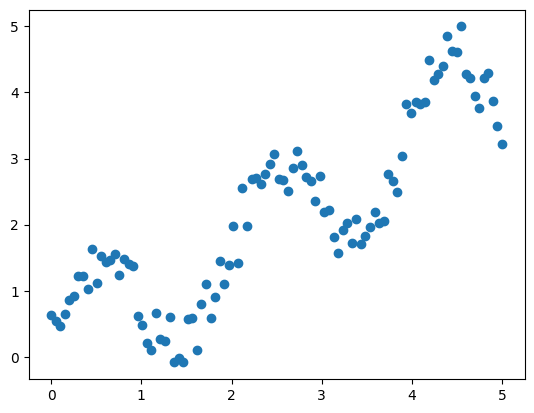

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5181647250603604


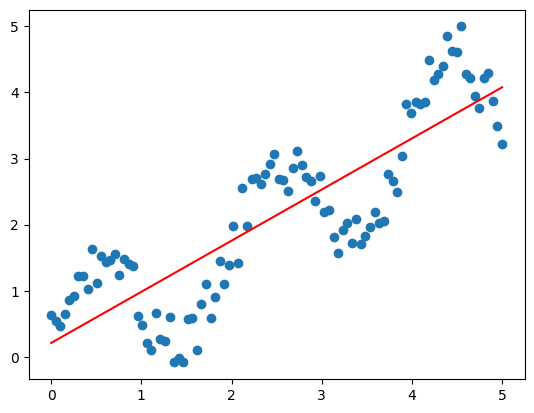

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

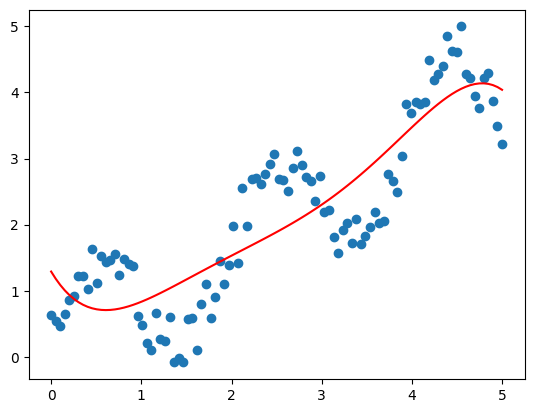

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.29311162  2.90147776 -1.32922127  0.28647522 -0.02278911]
interception:  1.2908064355083813


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.29080644, 1.18222431, 1.08744257, 1.00549976, 0.93547737,
       0.87649891, 0.82772904, 0.78837268, 0.75767405, 0.73491585,
       0.71941831, 0.71053831, 0.70766846, 0.71023626, 0.71770311,
       0.7295635 , 0.74534406, 0.76460268, 0.78692758, 0.81193648,
       0.83927562, 0.86861892, 0.89966707, 0.93214659, 0.96580899,
       1.00042985, 1.03580789, 1.07176413, 1.10814093, 1.14480114,
       1.18162718, 1.21852014, 1.25539888, 1.29219915, 1.32887267,
       1.36538622, 1.4017208 , 1.43787066, 1.47384245, 1.5096543 ,
       1.54533491, 1.5809227 , 1.61646485, 1.65201644, 1.68763955,
       1.72340233, 1.75937816, 1.79564467, 1.83228293, 1.86937647,
       1.90701046, 1.94527074, 1.98424296, 2.02401168, 2.06465945,
       2.10626595, 2.14890705, 2.19265393, 2.23757219, 2.28372094,
       2.33115189, 2.37990847, 2.43002495, 2.48152548, 2.53442325,
       2.58871956, 2.64440296, 2.70144828, 2.7598158 , 2.81945032,
       2.88028026, 2.94221679, 3.00515289, 3.06896247, 3.13349

In [16]:
regr_poly.predict(X_poly)

array([1.29080644, 1.18222431, 1.08744257, 1.00549976, 0.93547737,
       0.87649891, 0.82772904, 0.78837268, 0.75767405, 0.73491585,
       0.71941831, 0.71053831, 0.70766846, 0.71023626, 0.71770311,
       0.7295635 , 0.74534406, 0.76460268, 0.78692758, 0.81193648,
       0.83927562, 0.86861892, 0.89966707, 0.93214659, 0.96580899,
       1.00042985, 1.03580789, 1.07176413, 1.10814093, 1.14480114,
       1.18162718, 1.21852014, 1.25539888, 1.29219915, 1.32887267,
       1.36538622, 1.4017208 , 1.43787066, 1.47384245, 1.5096543 ,
       1.54533491, 1.5809227 , 1.61646485, 1.65201644, 1.68763955,
       1.72340233, 1.75937816, 1.79564467, 1.83228293, 1.86937647,
       1.90701046, 1.94527074, 1.98424296, 2.02401168, 2.06465945,
       2.10626595, 2.14890705, 2.19265393, 2.23757219, 2.28372094,
       2.33115189, 2.37990847, 2.43002495, 2.48152548, 2.53442325,
       2.58871956, 2.64440296, 2.70144828, 2.7598158 , 2.81945032,
       2.88028026, 2.94221679, 3.00515289, 3.06896247, 3.13349

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

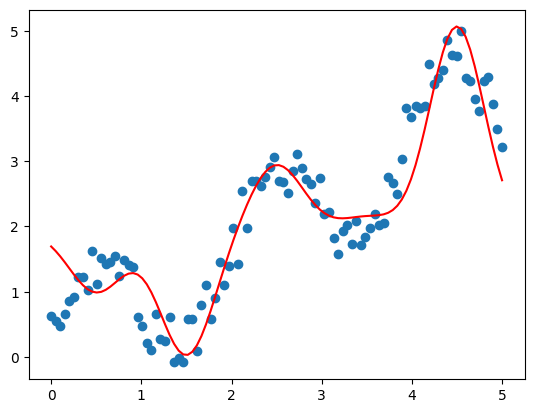

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.93053718 -1.89787155  1.02329067  0.21905298  3.14054445]
interception:  1.9258909357748633


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

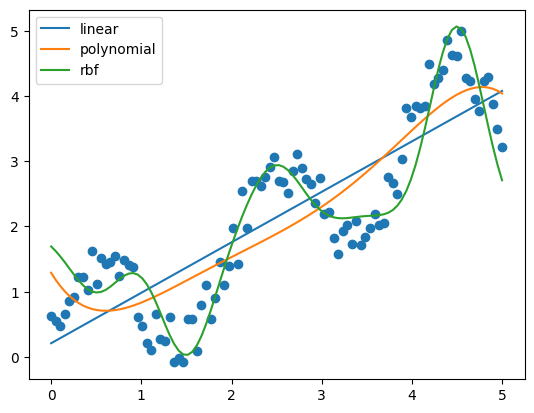

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [27]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5181647250603604


In [28]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.44048448017894243


In [29]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.21134895264482295
